<a href="https://colab.research.google.com/github/Thuan-Pham/SA-Knapsack/blob/master/%C4%90%E1%BB%81_%C3%A1n_AI_Simulate_Annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulate Annealing
Là giải thuật tìm kiếm cục bộ
Chiến lược tìm kiếm với tri thức bổ sung sử dụng các tri thức cụ thể của bài toán làm cho quá trình tìm kiếm hiệu quả hơn
> * Dựa trên quá trình tôi ủ (annealing 
process): Kim loại nguội đi
và lạnh cứng lại thành cấu trúc kết tinh
* Phương pháp tìm kiếm Simulated Annealing có thể tránh
được các điểm tối ưu cục bộ (local optima)
* Phương pháp tìm kiếm Simulated Annealing sử dụng chiến
lược tìm kiếm ngẫu nhiên, trong đó chấp nhận các thay đổi
làm tăng giá trị hàm mục tiêu (i.e., cần tối ưu) và cũng chấp
nhận (có hạn chế) các thay đổi làm giảm
* Phương pháp tìm kiếm Simulated Annealing sử dụng một
tham số điều khiển T (như trong các hệ thống nhiệt độ)
* Bắt đầu thì T nhận giá trị cao, và giảm dần về 0





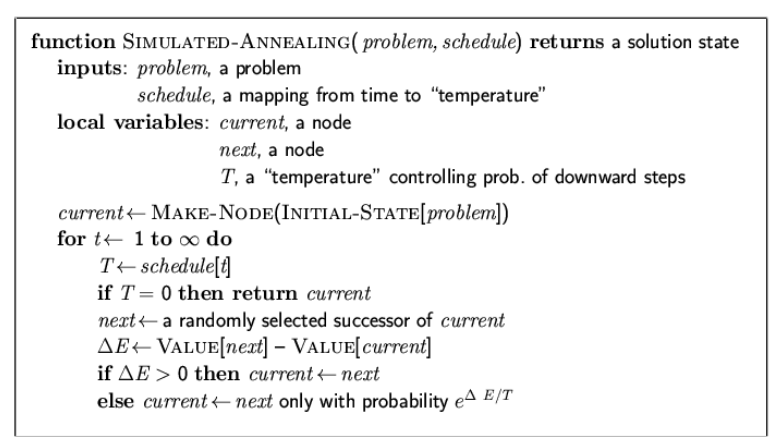

#Read Data

In [ ]:
uploaded = files.upload()

Saving knapsack.csv to knapsack.csv


In [ ]:
from google.colab import files
import pandas as pd 
import io
from random import random
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['knapsack.csv']))
# Dataset is now stored in a Pandas Dataframe
values = df['values'].to_numpy()
weights = df['weights'].to_numpy()
n_items = len(df)
capacity = 500
print('number of items in the dataset/knapsack = ',n_items)
print('capacity of the knapsack = ',capacity)
print('values of items:')
print(values)
print('weights of items:')
print(weights)

number of items in the dataset/knapsack =  99
capacity of the knapsack =  500
values of items:
[91 40 92 81 85 40 68 35 82 79 50  6 20 14 26 28 60 25  9 20 52 56  9 53
  9 46 94 31 84 49  5 43 18 61 37 95 42 57 17 14 42 68  5 11  5 83 96 34
 36 33 40 47 47 71 72 22 15 81 79 30  9 13 84 66 46 91 53 29 38 79 77 31
 67 36 43 87 55 38 77 31 31 41 53 82 31 45 84 34 25 67 64 49 29 79 69 20
 31 80 59]
weights of items:
[23 36 23 40 39 16 31 22 21  7 26 46 28 33  7 19 34 32  5  9  7 41 29 11
 43 39 43 50 37 42  7 41 38 10 30 38 23 48 45 40 13  6 24 33 38 13  6 25
 14 21 35  7 16 29 36 35 19 39 27 43 42 40 32 29 21 42 26 10 23 41 16 20
 45 48 44 36  5  5 29 24 22 36 41 48  8 12 16 39 28 48 48 15 12 33 27 37
 22 20 31]


## Đánh giá Solution

In [ ]:
def evaluate(packing):
    '''
    Returns a list of [v,w], where v and w are the total value and weight of packing respectively

            Parameters:
                    packing (numpy array): numpy array of 1/0 to indicate a specified packing

            Returns:
            if  w > capacity:
            [w-capacity, w] (list):  (w-capacity) is total weight of packing minus the capacity
                                     w is the total weight of packing 
            else:
                    [v,w] (list):  v and w are the total value and weight of packing respectively
    '''
    array = np.array(packing)
    values_array = np.array(values)
    weights_array = np.array(weights)
    # compute the total value of the items
    v = np.dot(array, values_array)  
    # compute the total weight of the items
    w = np.dot(array, weights_array)  
    if w > capacity:
        return [w-capacity, w]
    # returns array list of both total values and weight
    else:
        return [v, w]  # returns array list of both total array values

## Tìm Solution lân cận

In [ ]:
def One_Flip_Neighbourhood(packing):
    '''
    Returns a list of of all neighbours in the Neighbourhood of packing

            Parameters:
                    packing (numpy array): numpy array of 1/0 to indicate a specified packing

            Returns:
                    neighbourhood (list): a list of of all neighbours in the Neighbourhood of packing
                    The size of the 1-flip neighborhood = 100 
    '''    
    neighbourhood = []
    for i in range(0, n_items):
        temp = list(packing)
        neighbourhood.append(temp)
        if neighbourhood[i][i] == 1:
            neighbourhood[i][i] = 0
        else:
            neighbourhood[i][i] = 1
    return neighbourhood

## Solution Khởi điểm

In [ ]:
def Initial_solution(initial_proportion_items):  #initial prop of items is proportion of items in initial solution
    '''
    Returns a numpy array of the a specified packing/ initial solution

            Parameters:
                    initial_proportion_items (float): proportion of items in initial solution

            Returns:
                    packing (numpy array): numpy array of 1/0 to indicate a specified packing/ initial solution
    '''
    # seed
    np.random.seed(1)    
    # Draw samples from a binomial distribution
    packing = np.random.binomial(1, initial_proportion_items, size=n_items)
    print("Random Initial Solution of proportion: ", initial_proportion_items)
    print(np.array(packing))
    return packing

## Thuật toán Simulated Annealing

In [ ]:
def Simulated_Annealing(initial_proportion_items, initial_temperature, iter_per_temperature, final_temperature):
    '''
    Implementation of the Simulated Annealing with Cauchy cooling schedule AND one-flip neighbourhood
    Cauchy cooling schedule is defined to update the temperature T_k, 
    where T_k = initial_temperature/(k+1), and k is the temperature step
    
    
    Returns p: best packing, 
            v: total value of the items of the best packing, 
            w: total weight of the items of the best packing

            Parameters:
                   initial_proportion_items (float): proportion of items in initial solution
                   initial_temperature (float): initial temperature
                   iter_per_temperature (int): number of iterations per temperature
                   final_temperature (float): final temperature
            Returns:
                    p (numpy array): numpy array of 1/0 to indicate the best packing
                    v (float): total value of the items of the best packing
                    w (float): total weight of the items of the best packing
    '''
    print("Simulated Annealing")
    print("Initial Proportion of items = ", initial_proportion_items)
    print("Initial temperature = ", initial_temperature)
    print("Final temperature = ", final_temperature)
    print("Number of Iterations per temperature = ", iter_per_temperature)
    # initialises no. of solutions checked
    solutions_checked = 0
    # initialises no. of improving moves
    total_improvements = 0   
    # initialises no. of random moves
    total_random_steps = 0   
    # packing_current holds the current solution
    packing_current = Initial_solution(initial_proportion_items) 
    # packing_best holds the best solution
    packing_best = packing_current[:]  
    # e_current holds the evaluation of the current soluton
    e_current = evaluate(packing_current)[:]  
    e_best = e_current[:]
    k = 0
    # checks the temperature
    while (initial_temperature/(k+1) > final_temperature):  
        # Counts number of iterations at current temperature
        j = 0     
        # Counts number of improvements at current iteration
        improvements = 0   
        # Count number of random steps at current iteration
        random_steps = 0    
        while (j < iter_per_temperature):
            solutions_checked += 1
            # creates a list of all neighbours in the neighbourhood of packing_current
            Neighbourhood = One_Flip_Neighbourhood(packing_current)
            # Selects random neighbour
            s = Neighbourhood[random.randint(0, len(Neighbourhood)-1)]   
            if (evaluate(s)[0] > e_current[0]):
                packing_current = s[:]
                e_current = evaluate(s)[:]
                improvements += 1
            else:
                delta = evaluate(packing_current)[0] - evaluate(s)[0]
                probability = random.uniform(0,1)
                randomness = math.exp(-1 * (k+1) * delta / (initial_temperature))
                if (probability < randomness):
                    packing_current = s[:]
                    e_current = evaluate(s)[:]
                    random_steps += 1
             # Records the best value found so far
            if(e_current[0] > e_best[0]):   
                packing_best = packing_current[:]
                e_best = e_current[:]
            j += 1
        # increase the total improvements
        total_improvements += improvements   
        # increase the total random steps
        total_random_steps += random_steps         
        k += 1
    print("Total number of random steps:", total_random_steps,"\n",
          "Total number of improvements:", total_improvements)
    print("Number of packings checked:", solutions_checked)
    p = np.array(packing_best)
    v = e_best[0]
    w = e_best[1]
    return p, v, w

## Thực hiện

In [ ]:
def run_SA(number_runs, initial_proportion_items, 
           initial_temperature, iter_per_temperature,  final_temperature):
    '''
    Function to run Simulated Annealing with a specified number of runs
    
    Returns v_array: a list to store total value of the items of the best packing in number_runs times of run
            w_array: a list to store total weight of the items of the best packing in number_runs times of run

            Parameters:
                   number_runs (int): number of times to run Tabu Search
                   initial_proportion_items (float): proportion of items in initial solution
                   initial_temperature (float): initial temperature
                   iter_per_temperature (int): number of iterations per temperature
                   final_temperature (float): final temperature
            Returns:
                    v_array (list): a list to store total value of the items of the best packing in number_runs times of run
                    w_array (list): a list to store total weight of the items of the best packing in number_runs times of run
    '''
    v_array = []
    w_array = []
    for i in range(number_runs):
        print('Number of runs of the algorithm =',i+1)
        print("\nStarting solve() ")
        packing, v, w = Simulated_Annealing(initial_proportion_items,
                                initial_temperature, iter_per_temperature, 
                                final_temperature)
        print("\nBest packing found: ")
        print(packing)
        print("\nTotal value of packing = %0.1f " % v)
        print("Total weight of packing = %0.1f " % w)
        v_array.append(v)
        w_array.append(w)
        print("#############################################################################################")
    print("\nEnd")
    return v_array, w_array

## Đánh giá kết quả

In [ ]:
from matplotlib import pyplot as plt
def plot_value_weight(v_array, w_array, name_algo, number_runs):    
    '''
    Function to plot the total value of the items of the best packing in  each time of running the algorithm,
    and print average total value and weight in number_runs times of run

            Parameters:
                    v_array (list): a list to store total value of the items of the best packing in number_runs times of run
                    w_array (list): a list to store total weight of the items of the best packing in number_runs times of run
                    name_algo (str): the name of the algorithm, i.e either "Simulated Annealing" or "Tabu Search"
                    number_runs (int): number of times to run the algorithm
    '''
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots(figsize=(10,8))
    # make a plot
    ax.plot(range(1,11),v_array, color="red", marker="o")
    ax.set_xlabel('Number of runs of the ' + str(name_algo),fontsize=15)
    ax.set_ylabel('Final total value of packing',color="red",fontsize=15)
    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(range(1,11),w_array,color="blue",marker="x")
    ax2.set_ylabel('Final total weight of packing',color="blue",fontsize=15)
    plt.xticks(np.arange(1, 11, 1.0))
    plt.title("Final total value and weight of packing in " + str(number_runs)+ " runs",fontsize=18)
    plt.show()
    avg_v_total = np.mean(v_array)
    avg_w_total = np.mean(w_array)
    print("\nAverage total value of packing in "+ str(number_runs) +" runs = %0.1f " % avg_v_total)
    print("\nAverage total weight of packing in "+ str(number_runs) +" runs = %0.1f " % avg_w_total)

## Hàm Main

In [ ]:
number_runs = 1               
initial_proportion_items = 0.1
initial_temperature = 8000
iter_per_temperature = 50
final_temperature = 5
name_algo = "Simulated Annealing"
v_array, w_array = run_SA(number_runs, initial_proportion_items, 
           initial_temperature, iter_per_temperature,  final_temperature)

Number of runs of the algorithm = 1

Starting solve() 
Simulated Annealing
Initial Proportion of items =  0.1
Initial temperature =  8000
Final temperature =  5
Number of Iterations per temperature =  50
Random Initial Solution of proportion:  0.1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0]
Total number of random steps: 12423 
 Total number of improvements: 12507
Number of packings checked: 79950

Best packing found: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Total value of packing = 2259.0 
Total weight of packing = 2759.0 
#############################################################################################

End


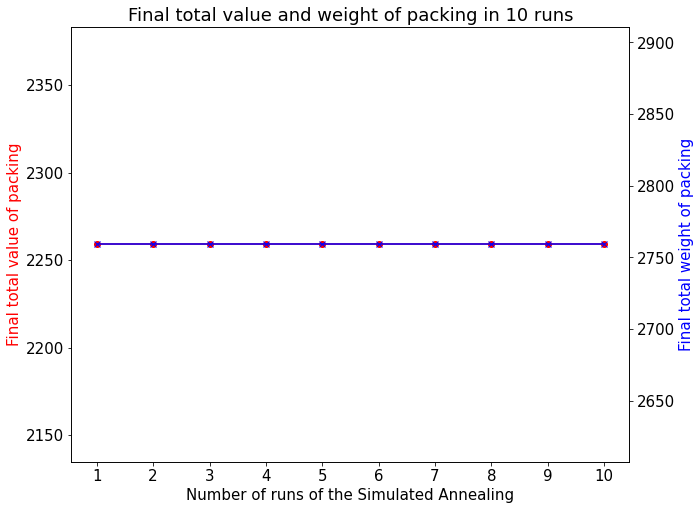


Average total value of packing in 10 runs = 2259.0 

Average total weight of packing in 10 runs = 2759.0 


In [ ]:
plot_value_weight(v_array, w_array, name_algo, number_runs)